# Multivariate Linear Regression

Consider a dataset with more potentially useful features which can be used for prediction as shown below,

| Feature 1 $$x_1$$ | Feature 2 $$x_2$$ | Feature 3 $$x_3$$ | Feature 4 $$x_4$$ | Target Variable $$y$$ |
|---|---|---|---|---|
|2104|5|1|45|460|
|1416|3|2|40|232|
|1534|3|2|30|315|
|852|2|1|36|178|
|$$\ldots$$|$$\ldots$$|$$\ldots$$|$$\ldots$$|$$\ldots$$|

This can now represent a multivariate linear regression problem, where $x^{(i)}\in\mathbb{R}^n$, for $n$ features with $i\in[1,\ldots,m]$. In this particular case, $n=4$.

The $j$-th input feature, where $j\in[1,\ldots,n]$. for the $i$-th training example, where $i\in[1,\ldots,m]$, shall be denoted as $x_j^{(i)}$

The model for linear regression can now be expressed as,
$$
f(x^{(i)})=w_1x_1^{(i)}+w_2x_2^{(i)}+\dots+w_jx_j^{(i)}+b
$$

A more compact notation uses vectors to represent $w\in\mathbb{R}^n$ and $x^{(i)}$, with $b\in\mathbb{R}$, such that
$$
w=\begin{bmatrix}w_1\\\vdots\\w_j\end{bmatrix}\quad x^{(i)}=\begin{bmatrix}x_1^{(i)}\\\vdots\\x_j^{(i)}\end{bmatrix}
$$

And the linear regression model can be rewritten as,
$$
f(x^{(i)})=w^\top x^{(i)}+b
$$

## Vectorized Implementation
An implementation which is much more computationally efficient can be achieved through *vectorization*, i.e, using the parallel processing capabilities of modern processors (CPU or GPU) to compute linear algebra calculations much faster than through loops.

Let $X\in\mathbb{R}^{n\times m}$ be defined as the *design matrix* contaning all values of $x_j^{(i)}$ for all $i\in[1,\ldots,m]$ and $j\in[1,\ldots,n]$, and let $Y$ be defined as a row vector containing all values of $y^{(i)}$
$$
    X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n
    \end{bmatrix}
    \qquad
    Y=\begin{bmatrix}y^{(1)}& \dots &y^{(m)}\end{bmatrix}
$$

Given parameters $w\in\mathbb{R}^{n}$ and $b\in\mathbb{R}$, the vector containing all predicted values $\hat{Y}$ can be achieved with very little changes from the original equations,
$$
    \hat{Y}=w^\top X+b
$$

With that said, the variable $b$ does not necessarily need to be a separate variable. Including a *dummy* feature $x^{(i)}_{j+1}=1$ for all $i$, within the design matrix allows for an additional component to $w$ as follows,
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
    \qquad
    w=\begin{bmatrix}w_1\\\vdots\\w_n\\b\end{bmatrix}
$$

With this, the calculations for $\nabla_{w}J(w)$ remain equivalent (see gradient descent), and the equation for $\hat{Y}$ becomes
$$
    \hat{Y}=w^\top X
$$

## Gradient Descent
Given the cost function $J(w,b)$ which has been previously defined as the *mean squared error*,
$$
J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
$$
The gradient of the cost function w.r.t the weights $w$ is
$$
\nabla_{\vec{w}}J(w,b)=\begin{bmatrix}
    \frac{\partial J(w,b)}{\partial w_1}, & \dots &, \frac{\partial J(w,b)}{\partial w_j}
\end{bmatrix}^\top
$$

The components of this gradient can be calculated as,
$$
\begin{align*}
    \frac{\partial J(w,b)}{\partial w_j}
    &=\frac{\partial}{\partial w_j}\left[\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[\frac{\partial}{\partial w_j}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot\frac{\partial}{\partial w_j}\left(w^\top x^{(i)}+b-y^{(i)}\right)\right]\\
    &=\frac{1}{2m}\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot x^{(i)}_j\right]\\
    &=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})\cdot x^{(i)}_j
\end{align*}
$$

Likewise, $\frac{\partial J(w,b)}{b}$ can be calculated as 
$$
\frac{\partial J(w,b)}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)
$$

Given the design matrix $X$ and parameters $w$ (with $b$ included), a vectorized implementation of $\nabla_{w}J(w)$ can be calculated as follows:

The residuals $\hat{Y}-Y$ can be obtained simply by subtracting the two vectors. After which, the vector can be transposed leading to,
$$
    (\hat{Y}-Y)^\top=\begin{bmatrix}\hat{y}^{(1)}-y^{(1)}\\\vdots\\\hat{y}^{(m)}-y^{(m)}\end{bmatrix}
$$

Recall that the design matrix $X$ is defined as
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
$$

With this, the gradient $\nabla_{w}J(w)$ can simply be calculated as a matrix-vector product,
$$
    \nabla_{w}J(w)=\frac{X(\hat{Y}-Y)^\top}{m}
$$

To see that this is valid, note that each component, $\nabla_{w}J(w)_j$ for $j\in[1,\ldots,n]$ evaluates to
$$
\nabla_{w}J(w)_j=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot x^{(i)}_j
$$

## Implementation

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Loading the **diabetes** dataset from sklearn

In [2]:
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y = True)

In [3]:
diabetes_X.shape

(442, 10)

In [4]:
diabetes_Y.shape

(442,)

Transforming the datasets into the proper matrixes for $X$ and $Y$

In [5]:
diabetes_X = diabetes_X.T
diabetes_X = np.row_stack([diabetes_X, np.full((1, diabetes_X.shape[1]), 1)])
diabetes_Y = diabetes_Y[:, np.newaxis].T

diabetes_X.shape, diabetes_Y.shape

((11, 442), (1, 442))

## Feature Scaling

To improve the performance of gradient descent, it helps to scale the features such that they are similar or comparable in terms of their ranges. There are multiple ways to perform these transformation: **z-score normalization**, or **mean normalization**

For *z-score normalization*, given the mean $\mu_j$ and standard deviation $\sigma_j$ for every feature $j\in[1,\ldots,n]$, the input feature $x^{(i)}_j$ for $i\in[1,\ldots,m]$ is transformed as
$$
x^{(i)}_j\leftarrow\frac{x^{(i)}_j-\mu_j}{\sigma_j}
$$
thus the resulting features now have $\mu_j=0$ and $\sigma_j=1$.

For *mean normalization*, given the mean $\mu_j$ and range $x_{j,max}-x_{j,min}$ for every feature $j\in[1,\ldots,n]$, the input feature $x^{(i)}_j$ for $i\in[1,\ldots,m]$ is transformed as
$$
x^{(i)}_j\leftarrow\frac{x^{(i)}_j-\mu_j}{x_{j,max}-x_{j,min}}
$$

In [6]:
def calc_optimal_params_grad_descent(train_X, train_Y, num_epochs, learning_rate):    
    n, m = train_X.shape
    w    = np.random.randn(n, 1)
    
    loss_hist = np.zeros(num_epochs)
    
    for i in range(num_epochs):
        Y_pred = np.dot(w.T, train_X)
        J_cost = np.mean((Y_pred - train_Y) ** 2) / 2.0
        loss_hist[i] = J_cost
        
        # Calculate gradients
        grad_W = np.dot(train_X, (Y_pred - train_Y).T) / m
        
        # Update the weights
        w = w - (learning_rate * grad_W)
        
    return w, loss_hist

weights, loss_hist = calc_optimal_params_grad_descent(diabetes_X, diabetes_Y, 10000, 1)

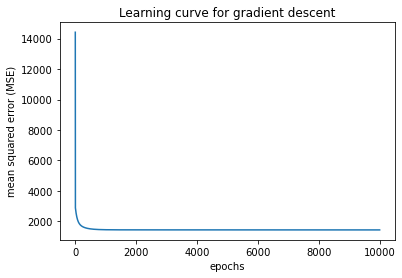

In [7]:
fig = plt.figure()
plt.title('Learning curve for gradient descent')
plt.xlabel('epochs')
plt.ylabel('mean squared error (MSE)')
plt.plot(loss_hist)
plt.show()

In [8]:
weights

array([[  -7.0341685 ],
       [-236.60114314],
       [ 527.60323623],
       [ 321.83339165],
       [-163.94305623],
       [ -26.00582044],
       [-174.92850824],
       [ 105.19736381],
       [ 514.96833878],
       [  69.77383282],
       [ 152.13348416]])

## The Normal Equation

Aside from gradient descent, there is also a direct or analytical method for calculating parameters $w$ for multiple linear regression. The equation for this is known as the *normal equation*. The normal equation for calculating the optimal parameters $w^*$ is given by,

$$
w^*=\left(XX^\top\right)^{-1}XY^\top
$$

*Proof*:

As before, the goal is to find parameters $w\in\mathbb{R}^{n\times 1}$ which minimizes the mean squared error across all training examples $Y\in\mathbb{R}^{1\times m}$ given $X\in\mathbb{R}^{n\times m}$, in a multivariable scenario, this is expressed as $J(w)$,
$$
\begin{align*}
J(w)
&=\frac{1}{2m}\left(w^\top X-Y\right)^\top\left(w^\top X-Y\right)\\
&=\frac{1}{2m}\left[\left(w^\top X\right)^\top-Y^\top\right]\left(w^\top X-Y\right)\\
&=\frac{1}{2m}\left[(w^\top X)(w^\top X)^\top-w^\top XY^\top -Y(w^\top X)^\top +Y^\top Y\right]\\
&=\frac{1}{2m}\left[w^\top XX^\top w-2Y\left(w^\top X\right)^\top+Y^\top Y\right]\\
\end{align*}
$$

We must then calculate the gradient of the cost w.r.t the weights $w$ as follows

$$
\begin{align*}
\frac{\partial J(w)}{\partial w}
&=\frac{1}{2m}\cdot\frac{\partial}{\partial w}\left[w^\top XX^\top w-2Y\left(w^\top X\right)^\top+Y^\top Y\right]\\
\end{align*}
$$

We shall derive each term separately for simplification. Starting with the third term.

$$
\frac{\partial}{\partial w}Y^\top Y=0
$$

For the second term, recall the structure of both vectors,
$$
Y=\begin{bmatrix}y^{(1)} & \dots & y^{(m)}\end{bmatrix}
\quad
\text{and}
\quad
\left(w^\top X\right)^\top=\begin{bmatrix}
    w_1x^{(1)}_1+\ldots+w_nx^{(1)}_n \\
    \vdots \\
    w_1x^{(m)}_1+\ldots+w_nx^{(m)}_n
\end{bmatrix}
$$

Therefore, the dot product is
$$
Y\left(w^\top X\right)^\top
=y^{(1)}\left(w_1x^{(1)}_1+\ldots+w_nx^{(1)}_n\right)+\ldots+y^{(m)}\left(w_1x^{(m)}_1+\ldots+w_nx^{(m)}_n\right)
$$

Thus the partial derivative w.r.t a weight $w_j$ would be defined as
$$
\frac{\partial }{w_j}Y\left(w^\top X\right)^\top=\sum_{i=1}^{m}y^{(i)}x^{(i)}_{j}
$$

This can be expressed as a matrix vector multiplication
$$
\frac{\partial }{w_j}2Y\left(w^\top X\right)^\top=2XY^\top
$$

To see that this is valid, note that each element in this vector result is,
$$
(XY^\top)_{j}=\sum_{i=1}^{m}y^{(i)}x^{(i)}_j
$$

To simplify the calculation of the first term, note that by the associativity of matrix multiplication, we can multiply $XX^\top\in\mathbb{R}^{n\times n}$ to obtain a square and symmetric matrix, further denoted as $A$ where
$$
A_{j,k}=\left(XX^\top\right)_{j,k}=\sum_{i=1}^{m}X_{j,i}X^\top_{i,k}
$$

Note that $XX^\top w$ becomes
$$
XX^\top w=Aw=\begin{bmatrix}
    w_1A_{1,1}+\ldots+w_nA_{1,n} \\
    \vdots \\
    w_1A_{n,1}+\ldots+w_nA_{n,n} \\
\end{bmatrix}
$$

Thus the full product, $w^\top XX^\top w$, becomes
$$
w^\top XX^\top w=w^\top Aw=w_1\left(w_1A_{1,1}+\ldots+w_nA_{1,n}\right)+\dots+w_n\left(w_1A_{n,1}+\ldots+w_nA_{n,n}\right)
$$

Calculating the partial derivative w.r.t a weight $w_1$ for example becomes the following, note that $A$ is symmetric, therefore an element such as $A_{2,1}=A_{1,2}$
$$
\begin{align*}
\frac{\partial w^\top Aw}{w_1}
&=2w_1A_{1,1}+2w_2A_{1,2}+\ldots+2w_nA_{1,n}\\
&=2\left(w_1A_{1,1}+w_2A_{1,2}+\ldots+w_nA_{1,n}\right)
\end{align*}
$$

The same holds for the partial derivative with respect to other weights $w_j$. This can therefore be expressed as the following matrix vector multiplication
$$
\frac{\partial}{\partial w}w^\top XX^\top w=2XX^\top w
$$

The full equation becomes the following
$$
\begin{align*}
\nabla J(w)
&=\frac{1}{2m}\left(2XX^\top w-2XY^\top\right)\\
&=\frac{1}{m}\left(XX^\top w-XY^\top\right)\\
\end{align*}
$$

Setting this equation to $0$ and solving for $w$ becomes
$$
\begin{align*}
    \frac{1}{m}\left(XX^\top w-XY^\top\right)&=0\\
    XX^\top w-XY^\top&=0\\
    XX^\top w&=XY^\top\\
    w&=\left(XX^\top\right)^{-1}XY^\top
\end{align*}
$$

In [9]:
X = diabetes_X
Y = diabetes_Y
X.shape, Y.shape

((11, 442), (1, 442))

In [10]:
w_ne = np.dot(np.linalg.inv(np.dot(X, X.T)), np.dot(X, Y.T))

In [11]:
mse_ne = np.mean((np.dot(w_ne.T, X) - Y) ** 2)
mse_gd = np.mean((np.dot(weights.T, X) - Y) ** 2)

print('Mean squared errors:')
print('Normal equation : {:.2f}'.format(mse_ne))
print('Gradient descent: {:.2f}'.format(mse_gd))

Mean squared errors:
Normal equation : 2859.69
Gradient descent: 2874.91


In [12]:
w_ne, weights

(array([[ -10.01219782],
        [-239.81908937],
        [ 519.83978679],
        [ 324.39042769],
        [-792.18416163],
        [ 476.74583782],
        [ 101.04457032],
        [ 177.06417623],
        [ 751.27932109],
        [  67.62538639],
        [ 152.13348416]]),
 array([[  -7.0341685 ],
        [-236.60114314],
        [ 527.60323623],
        [ 321.83339165],
        [-163.94305623],
        [ -26.00582044],
        [-174.92850824],
        [ 105.19736381],
        [ 514.96833878],
        [  69.77383282],
        [ 152.13348416]]))